# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: David Julien 30022100 / Canart Florentin 62872100

Part. 2: Canart Florentin 62872100 / Habets Norah 39802100

Part. 3: Squifflet Benjamin 34412100 / David Julien 30022100

Part. 4: /

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


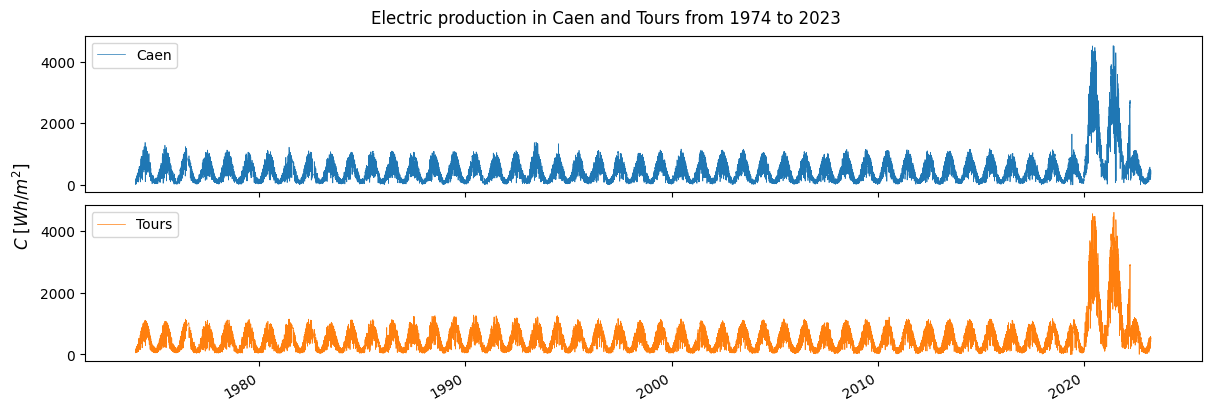

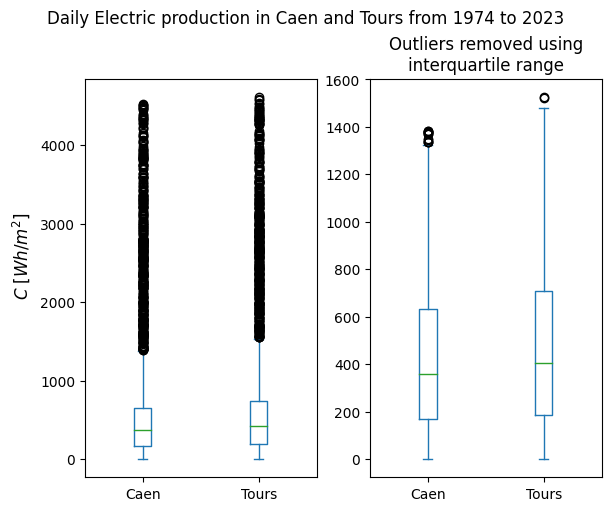

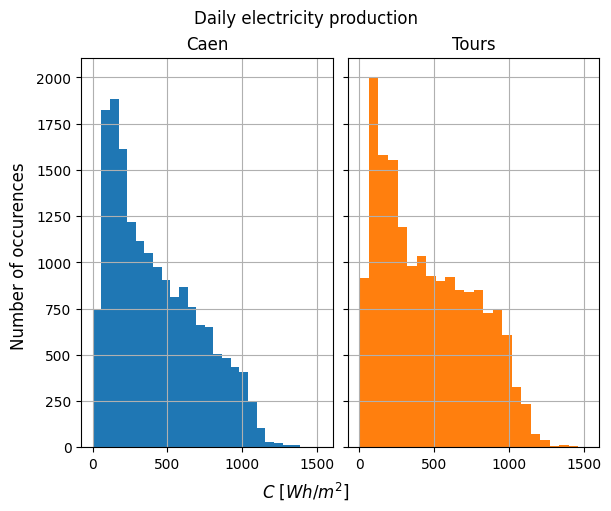

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from datetime import datetime
import matplotlib.dates as mdates

df = pd.read_csv("Radiation.csv")
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d")
df["Caen"] = df["Caen"]*24*0.18*0.75
df["Tours"] = df["Tours"]*24*0.18*0.75

fig, axs = plt.subplots(2, 1, layout='constrained', sharex=True, sharey=True, figsize=(12, 4))
fig.suptitle("Electric production in Caen and Tours from 1974 to 2023")
fig.supylabel("$C$ $[Wh/m^2]$")
plt.xticks(rotation=70)
df.plot(x="DATE", y="Caen", ax=axs[0], linewidth=.5)
df.plot(x="DATE", y="Tours", ax=axs[1], color='tab:orange', linewidth=.5)
axs[1].set_xlabel("")
plt.minorticks_off()

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(6, 5))
fig.suptitle("Daily Electric production in Caen and Tours from 1974 to 2023")
fig.supylabel("$C$ $[Wh/m^2]$")
axs[1].set_title("Outliers removed using\ninterquartile range")
df[["Caen", "Tours"]].plot(kind="box", ax=axs[0])

caen_q1 = df["Caen"].quantile(0.25); caen_q3 = df["Caen"].quantile(0.75)
caen_iqr = (caen_q3 - caen_q1)*1.5
tours_q1 = df["Tours"].quantile(0.25); tours_q3 = df["Tours"].quantile(0.75)
tours_iqr = (tours_q3 - tours_q1)*1.5
outliers = df[
    (df["Caen"] < caen_q1 - caen_iqr) | (df["Caen"] > caen_q3 + caen_iqr) |
    (df["Tours"] < tours_q1 - tours_iqr) | (df["Tours"] > tours_q3 + tours_iqr)
]
df = df.drop(outliers.index)
df[["Caen", "Tours"]].plot(kind="box", ax=axs[1])

bins = int((df["Caen"].max() - df["Caen"].min())/(2*caen_iqr*len(df["Caen"])**(-1/3))) # The Freedman-Diaconis rule
fig, axs = plt.subplots(1, 2, layout='constrained', sharey=True,sharex=True , figsize=(6, 5))
df["Caen"].hist(bins=bins, ax=axs[0])
df["Tours"].hist(bins=bins, ax=axs[1], color="tab:orange")
fig.suptitle("Daily electricity production")
axs[0].set_title("Caen")
axs[1].set_title("Tours")
fig.supxlabel("$C$ $[Wh/m^2]$")
fig.supylabel("Number of occurences");


### Commentaire 1.1
#### Production d'électricité en fonction du temps
On remarque un accroissement très marqué de l'irradiation solaire à partir de 2020.
Certaines années sont plus irradiées que d'autres et l'irradiation varie beaucoup entre les mois d'hiver (octobre-mars) et les mois d'été (avril-septembre).

#### Boîtes à moustaches
Sur le diagramme en boîte de gauche, on remarque beaucoup de données aberrantes représentées par le nombre important de "fliers" au-dessus de la moustache supérieure. Ces données peuvent ensuite être supprimées grâce à la méthode IQR.
Le diagramme en boîte de droite représente alors la base de données débarrassée de ses données aberrantes.

---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['Month'] = df['DATE'].dt.month

month_names = [
    "janvier", "février", "mars", "avril", "mai", "juin",
    "juillet", "août", "septembre", "octobre", "novembre", "décembre"
]

caen_canevas = []
tours_canevas = []

for month in range(1, 13):
    month_data = df[df['Month'] == month]

    caen_month = month_data['Caen']
    caen_canevas.append([
        month_names[month - 1],  
        caen_month.mean(),
        caen_month.median(),
        caen_month.std(),
        np.percentile(caen_month, 5),
        np.percentile(caen_month, 95)
    ])

    tours_month = month_data['Tours']
    tours_canevas.append([
        month_names[month - 1], 
        tours_month.mean(),
        tours_month.median(),
        tours_month.std(),
        np.percentile(tours_month, 5),
        np.percentile(tours_month, 95)
    ])

columns = ["Month", "Average", "Median", "Std Dev", "5th Percentile", "95th Percentile"]
df_caen_canevas = pd.DataFrame(caen_canevas, columns=columns)
df_tours_canevas = pd.DataFrame(tours_canevas, columns=columns)

print("Statistiques pour Caen :")
print(df_caen_canevas)

print("\nStatistiques pour Tours :")
print(df_tours_canevas)



Statistiques pour Caen :
        Month     Average  Median     Std Dev  5th Percentile  95th Percentile
0     janvier  146.875119  123.12  113.159389          42.120           304.56
1     février  250.502060  223.56  169.342515          70.794           466.56
2        mars  377.936082  359.64  186.508560         126.360           654.48
3       avril  560.370744  573.48  210.446375         204.120           874.80
4         mai  677.079224  703.08  255.096683         233.280          1033.56
5        juin  736.639826  751.68  265.879222         291.600          1108.08
6     juillet  725.442174  738.72  241.355234         317.520          1065.96
7        août  623.100853  638.28  198.019046         282.690           913.68
8   septembre  459.978462  466.56  168.786566         181.926           709.56
9     octobre  282.711774  268.92  154.382318          88.614           492.48
10   novembre  173.025839  155.52  124.765820          48.600           314.28
11   décembre  114.459313  

### Commentaire 1.2

L'élément le plus remarquable est le caractère oscillatoire des données, nous obtenons de manière générale des amplitudes minimums en hiver et des amplitudes maximales en été. On notera que plus les valeurs sont grandes plus elles varient.


---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


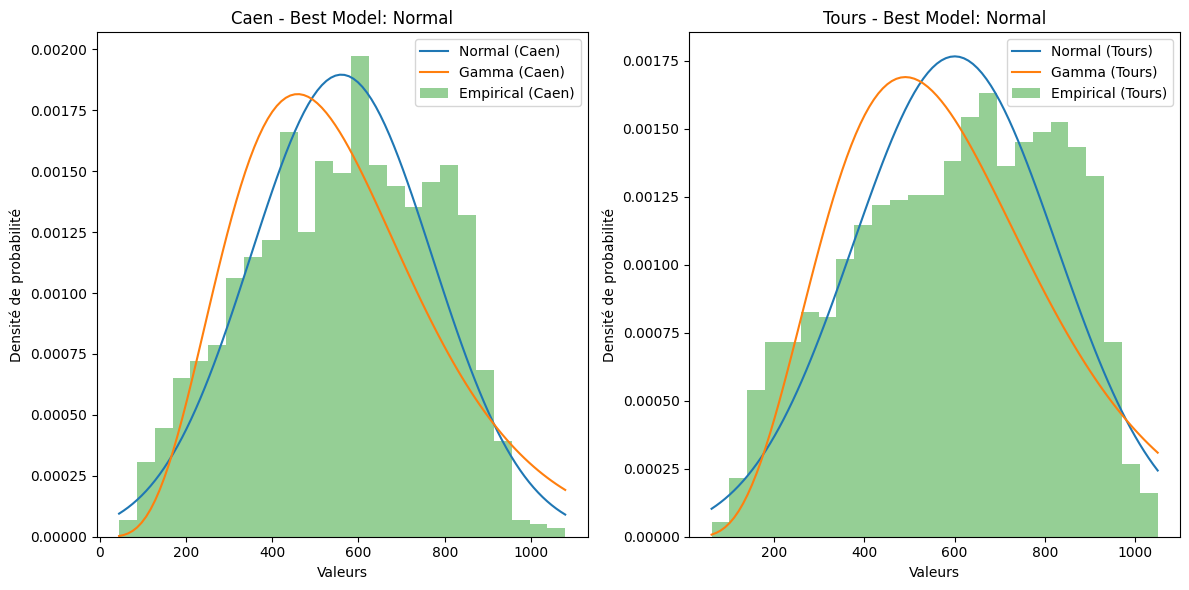

RMSE (Normal, Caen): 3.81e-04
RMSE (Gamma, Caen): 4.51e-04
RMSE (Normal, Tours): 3.83e-04
RMSE (Gamma, Tours): 4.60e-04
Log-Vraisemblance (Normal, Caen): -9549.38685406591
Log-Vraisemblance (Gamma, Caen): -9635.883766471161
Log-Vraisemblance (Normal, Tours): -9649.520623487704
Log-Vraisemblance (Gamma, Tours): -9737.796865103606


In [3]:
import scipy.stats as stats

april_caen = df[df['Month'] == 4]['Caen'].values
april_tours = df[df['Month'] == 4]['Tours'].values

# fit gamma et normal
gamma_params_caen = stats.gamma.fit(april_caen, floc=-0.001)
gamma_params_tours = stats.gamma.fit(april_tours, floc=-0.001)
normal_params_caen = stats.norm.fit(april_caen)
normal_params_tours = stats.norm.fit(april_tours)


# log-vraisemblances et sélection du meilleur modele
log_likelihood_gamma_caen = sum(stats.gamma.logpdf(april_caen, *gamma_params_caen))
log_likelihood_gamma_tours = sum(stats.gamma.logpdf(april_tours, *gamma_params_tours))
log_likelihood_normal_caen = sum(stats.norm.logpdf(april_caen, *normal_params_caen))
log_likelihood_normal_tours = sum(stats.norm.logpdf(april_tours, *normal_params_tours))


best_model_caen = "Gamma" if log_likelihood_gamma_caen > log_likelihood_normal_caen else "Normal"
best_model_tours = "Gamma" if log_likelihood_gamma_tours > log_likelihood_normal_tours else "Normal"

# graphs
plt.figure(figsize=(12, 6))

x_min_caen = min(april_caen)
x_max_caen = max(april_caen)
x_min_tours = min(april_tours)
x_max_tours = max(april_tours)

x_caen = linspace(x_min_caen, x_max_caen, 100)
x_tours = linspace(x_min_tours, x_max_tours, 100)

# Graphique Caen
plt.subplot(1, 2, 1)
pdf_norm_caen = stats.norm.pdf(x_caen, *normal_params_caen)
pdf_gamma_caen = stats.gamma.pdf(x_caen, *gamma_params_caen)
plt.plot(x_caen, pdf_norm_caen, label=f"Normal (Caen)")
plt.plot(x_caen, pdf_gamma_caen, label=f"Gamma (Caen)")
plt.hist(april_caen, bins=25, density=True, alpha=0.5, label="Empirical (Caen)")
plt.legend()
plt.title(f"Caen - Best Model: {best_model_caen}")

plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")

# Graphique Tours
plt.subplot(1, 2, 2)
pdf_norm_tours = stats.norm.pdf(x_tours, *normal_params_tours)
pdf_gamma_tours = stats.gamma.pdf(x_tours, *gamma_params_tours)
plt.plot(x_tours, pdf_norm_tours, label=f"Normal (Tours)")
plt.plot(x_tours, pdf_gamma_tours, label=f"Gamma (Tours)")
plt.hist(april_tours, bins=25, density=True, alpha=0.5, label="Empirical (Tours)")
plt.legend()
plt.title(f"Tours - Best Model: {best_model_tours}")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")
plt.tight_layout()
plt.show()


# RMSE
hist_caen, bins_caen = histogram(april_caen, bins=100, density=True)
rmse_norm_caen = sqrt(mean((pdf_norm_caen - hist_caen)**2))
rmse_gamma_caen = sqrt(mean((pdf_gamma_caen - hist_caen)**2))

hist_tours, bins_tours = histogram(april_tours, bins=100, density=True)
rmse_norm_tours = sqrt(mean((pdf_norm_tours - hist_tours)**2))
rmse_gamma_tours = sqrt(mean((pdf_gamma_tours - hist_tours)**2))

print("RMSE (Normal, Caen):", "{:.2e}".format(rmse_norm_caen))
print("RMSE (Gamma, Caen):", "{:.2e}".format(rmse_gamma_caen))
print("RMSE (Normal, Tours):", "{:.2e}".format(rmse_norm_tours))
print("RMSE (Gamma, Tours):", "{:.2e}".format(rmse_gamma_tours))

print("Log-Vraisemblance (Normal, Caen):", log_likelihood_normal_caen)
print("Log-Vraisemblance (Gamma, Caen):", log_likelihood_gamma_caen)
print("Log-Vraisemblance (Normal, Tours):", log_likelihood_normal_tours)
print("Log-Vraisemblance (Gamma, Tours):", log_likelihood_gamma_tours)


### Justification 2.1.2

La distribution gamma est la meilleure distribution lorsque les données sont disposées de manière asymétrique et ont tendance à être repoussées vers la gauche et à devenir plus rares et étalées lorsque leur valeur augmente. Au contraire, la distribution normale est la plus appropriée lorsque les données sont réparties de manière relativement symétrique autour de la moyenne et que la distribution suit une forme de cloche.

Dans mon code, afin de déterminer quelle distribution est la plus pertinente pour chaque ville, je calcule numériquement la log-vraisemblance et je choisis, pour chaque ville, la distribution ayant une log-vraisemblance la plus proche de zéro.

Dans les deux villes, la meilleure des distributions est la distribution normale. Cependant, je précise que si on ne fixe pas loc à -0.001, notre distribution gamma est plus adaptée et ressemble à notre distribution normale tout en restant moins précise.

Afin de vérifier mes résultats, je calcule l'erreur quadratique moyenne entre mon histogramme et mes distributions pour 100 données.

### Réponse 2.1.4

En cours, nous avions vu la loi de la distribution gamma comme dépendante de deux paramètres : alpha et bêta, où alpha détermine la courbure de la distribution et bêta l'échelle. En Python, on a trois paramètres dans `gamma.pdf(x, a, loc, scale)`. Les paramètres `a` et `scale` représentent respectivement alpha et bêta, et il existe un troisième paramètre, `loc`, qui est facultatif mais permet de décaler la distribution sur l'axe des x.


---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [4]:
import scipy.stats as sc
from numpy import *

#on prend les données d'avril
april_data = df[df["DATE"].dt.month == 4]

n = april_data.shape[0]
Caen_mean = mean(april_data["Caen"])
Tours_mean = mean(april_data["Tours"])
#std = écart-type
Caen_std  = std(april_data["Caen"],ddof=1)
Tours_std = std(april_data["Tours"],ddof=1)

#on calcule l'écart type combiné des deux échantillons
Spool = sqrt(((n-1)*Caen_std**2+(n-1)*Tours_std**2)/(n+n-2))
#on calcule la statistique de T test
Tx    = (Caen_mean-Tours_mean)/(Spool*sqrt(1/n+1/n))

#seuil de confiance de 95 % dans les tests statistiques
alpha = 0.05

#la p-value mesure la probabilité d'obtenir une statistique de T test Saussi extrême que celle observée (Tx), 
#sous l'hypothèse nulle que les moyennes sont égales
pval = 2*sc.t.cdf(-abs(Tx),df=n+n-2)

if (pval > alpha) :
    print("On ne rejette pas H0, les moyennes sont égales.")
else :
    print("On rejette H0, les moyennes ne sont pas égales.")

On rejette H0, les moyennes ne sont pas égales.


### Commentaire 2.2

Le code ci-dessus effectue un Student's T test indépendant pour comparer les moyennes de la production en avril entre les villes de Caen et Tours. Pour ce faire, j'ai calculé la statistique de T test pour trouver la pvalue, et en prenant un alpha correspondant à un seuil de confiance de 95 %, il suffit de les comparer pour voir que les moyennes de production en avril ne sont statistiquement pas les mêmes dans les deux villes. Il est important de noter que le T test indépendant suppose certaines conditions, telles que la normalité des distributions et l'homogénéité des variances. Il faudrait donc s'assurer que ces conditions sont satisfaites avant d'interpréter les résultats du test.

---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [5]:
Tx    = Caen_std**2/Tours_std**2
pval = 1-sc.f.cdf(Tx, n-1 , n-1)

if (pval > alpha) :
    print("On ne rejette pas H0, les variances sont égales.")
else :
    print("On rejette H0, les variances ne sont pas égales.")

On ne rejette pas H0, les variances sont égales.


### Commentaire 2.3

De la même façon qu'au point 2.2, je calcule la statistique de T test correspondante pour avoir la pvalue, je compare à alpha pour observer que les variances de production en avril sont statistiquement les mêmes dans les deux villes.

---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

### Réponse 2.4
Le test de Wilcoxon est un test statistique qui permet de tester un échantillon de données, ou de comparer 2 échantillons appariés. Son but est de tester s'il y a un changement sur la médiane. 

Si n est petit et que l’on soupçonne une distribution non normale, le Student's T test ne fonctionne pas, c'est donc pour cela que nous utilisons le test de Wilcoxon qui est soumis à beaucoup moins d'hypothèses. Son principal avantage est que la variance de 2 échantillons peut être différente.

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [6]:
from scipy.stats import wilcoxon
stats, pval_wilcoxon = wilcoxon(april_data["Caen"], april_data["Tours"])

if(pval_wilcoxon > alpha) :
    print("Les moyennes sont égales.")
else :
    print("Les moyennes ne sont pas égales.")

Les moyennes ne sont pas égales.


### Réponse 2.5

Grâce à scipy, on a une formule toute faite pour calculer la pvalue et la statistique de T test le test de Wilcoxon. Je compare ensuite, de la même façon qu'avant, la pvalue et alpha pour voir que les moyennes de production en avril ne sont statistiquement pas les mêmes dans les deux villes, comme vu au point 2.2. Ce tets de Wilcoxon fonctionne sans les conditions du Student's T test, mais est juste moins précis.

---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


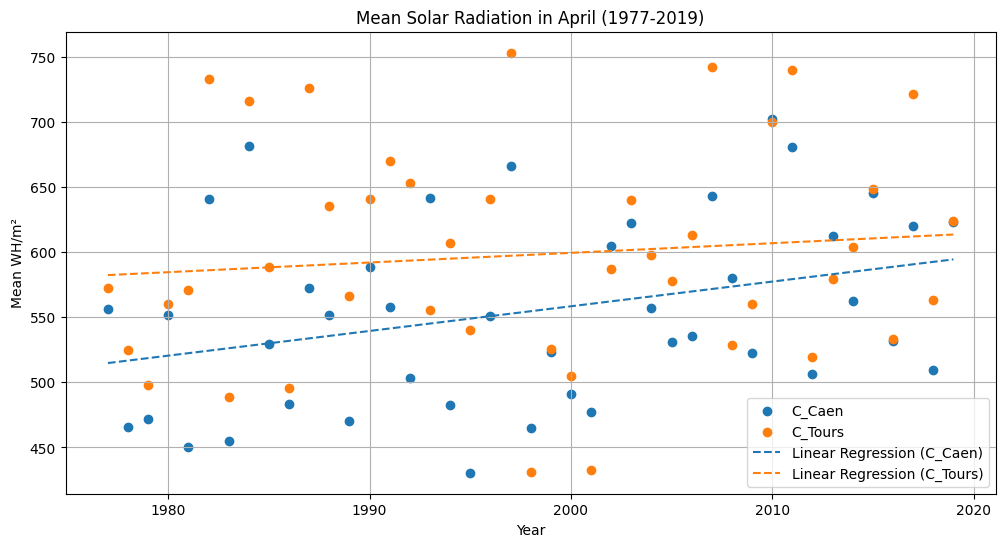

In [7]:
import scipy.stats as stats
C_Caen_fix = array(df["Caen"])
C_Tours_fix = array(df["Tours"])
dates_fix = array(df["DATE"])

data = pd.DataFrame({'Date': dates_fix, 'C_Caen': C_Caen_fix, 'C_Tours': C_Tours_fix})
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

april_data = data[(data['Month'] == 4)]
list_mean_Caen = april_data.groupby('Year')['C_Caen'].mean().tolist()
list_mean_Tours = april_data.groupby('Year')['C_Tours'].mean().tolist()
l=list(range(1974, 2023))[3:-3]
list_mean_Caen = list_mean_Caen[3:-2]
list_mean_Tours = list_mean_Tours[3:-2]

slopeCaen, interceptCaen, r, p, std_err = stats.linregress(l, list_mean_Caen)
def myfunc(x):
  return slopeCaen * x + interceptCaen
mymodelCaen = list(map(myfunc, l))

slopeTours, interceptTours, r, p, std_err = stats.linregress(l, list_mean_Tours)
def myfunc(x):
  return slopeTours * x + interceptTours
mymodelTours = list(map(myfunc, l))

plt.figure(figsize=(12, 6))
plt.scatter(l, list_mean_Caen, label='C_Caen')
plt.scatter(l, list_mean_Tours, label='C_Tours')
plt.plot(l, mymodelCaen, linestyle='--', label='Linear Regression (C_Caen)')
plt.plot(l, mymodelTours, linestyle='--', label='Linear Regression (C_Tours)')
plt.xlabel('Year')
plt.ylabel('Mean WH/m²')
plt.title('Mean Solar Radiation in April (1977-2019)')
plt.legend()
plt.grid(True)

### Commentaire 3.1
Les données sont très disparates mais la régression linéaire nous montre une augmentation significative de la production d'énérgie solaire de 1977 à 2019. Cette augmentation peut être due à l'intensification de l'effet de serre ces dernières décennies, qui empèche les radiations solaires de s'échapper de l'atmosphère. Le comportement des données de Caen et Tours est assez similaire même si le taux de radiation augmente plus vite à Caen, l'écart entre les deux villes se réduit donc.

---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [8]:
from statsmodels.tsa.ar_model import AutoReg

def mae(a, b):
    n = len(a)
    sum = 0
    for i in range(n): sum += abs(a[i] - b[i])
    return sum/n

df = pd.DataFrame(asarray(df["Caen"]), index=df["DATE"], columns=["Caen"]).resample('D').ffill() # resampling to avoid missing days and ValueWarning
training_set = df["1977-01-01":"2010-12-31"]
validation_set = df["2011-01-01":"2019-12-31"]

res = AutoReg(training_set, 10, trend="n").fit()
pred = res.predict()
print("Mean Absolute Error : MAE = {}".format(mae(array(training_set)[10:].T[0],array(pred)[10:])))
res.summary()


Mean Absolute Error : MAE = 122.03632694326673


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Caen   No. Observations:                12418
Model:                    AutoReg(10)   Log Likelihood              -80883.280
Method:               Conditional MLE   S.D. of innovations            163.973
Date:                Thu, 26 Oct 2023   AIC                         161788.560
Time:                        18:35:42   BIC                         161870.247
Sample:                    01-11-1977   HQIC                        161815.916
                         - 12-31-2010                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Caen.L1        0.4075      0.009     45.534      0.000       0.390       0.425
Caen.L2        0.1087      0.010     11.258      0.000       0.090       0.128
Caen.L3        0.0612      0.010      6.305      0.000       0.042       0.080
Caen.L4        0.0980      0.010     10.104      0.000       0.079       0.117
Caen.L5        0.0155      0.010      1.594      0.111      -0.004       0.035
Caen.L6        0.0635      0.010      6.526      0.000       0.044       0.083
Caen.L7        0.0630      0.010      6.496      0.000       0.044       0.082
Caen.L8        0.0408      0.010      4.208      0.000       0.022       0.060
Caen.L9        0.0460      0.010      4.766      0.000       0.027       0.065
Caen.L10       0.0801      0.009      8.957      0.000       0.063       0.098
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0043           -0.0000j            1.0043           -0.0000
AR.2             0.9936           -0.7438j            1.2412           -0.1023
AR.3             0.9936           +0.7438j            1.2412            0.1023
AR.4             0.4173           -1.2608j            1.3281           -0.1991
AR.5             0.4173           +1.2608j            1.3281            0.1991
AR.6            -0.3809           -1.2603j            1.3166           -0.2967
AR.7            -0.3809           +1.2603j            1.3166            0.2967
AR.8            -1.3501           -0.0000j            1.3501           -0.5000
AR.9            -1.1442           -0.8029j            1.3978           -0.4026
AR.10           -1.1442           +0.8029j            1.3978            0.4026
------------------------------------------------------------------------------
"""

### Réponse 3.2.c
Une première manière d'analyser la qualité du modèle serait de se baser sur les métriques affichées (Log Likelihood, S.D. of innovations, AIC, BIC, HQIC) mais elles ne sont pertinentes que si elles sont comparées à un autre modèle.
Une meilleure manière est d'observer les coefficients et leur déviation standard associées. On remarque que si la déviation standard est du même ordre de grandeur que le coefficient, l'intervalle de confiance pour ce coefficient contient le zéro. (C'est le cas du coefficient `Caen.L5` par exemple.) Il serait alors plus adapté d'ignorer ce coefficient et d'ainsi améliorer la précision de tous les autres.

Enfin on peut imaginer un modèle trivial qui serait de simplement prendre la valeur du jour précédent, calculer la moyenne en valeur absolue des erreurs (MAE) et la comparer à la moyenne de notre modèle autorégressif.
```python
>>> print("Mean Absolute Error : MAE = {}".format(mae(array(training_set)[1:].T[0],array(training_set.shift())[1:].T[0])))                                                                         
Mean Absolute Error : MAE = 135.61606185068558
```
On observe alors que la MAE n'est pas significativement plus petite avec notre modèle qu'avec le modèle trivial. La qualité du modèle n'est donc pas mauvaise, mais il n'est pas vraiment si précise.

---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

Mean Absolute Error with validation set : MAE = 123.86419822434247
R² = 0.681659296799378


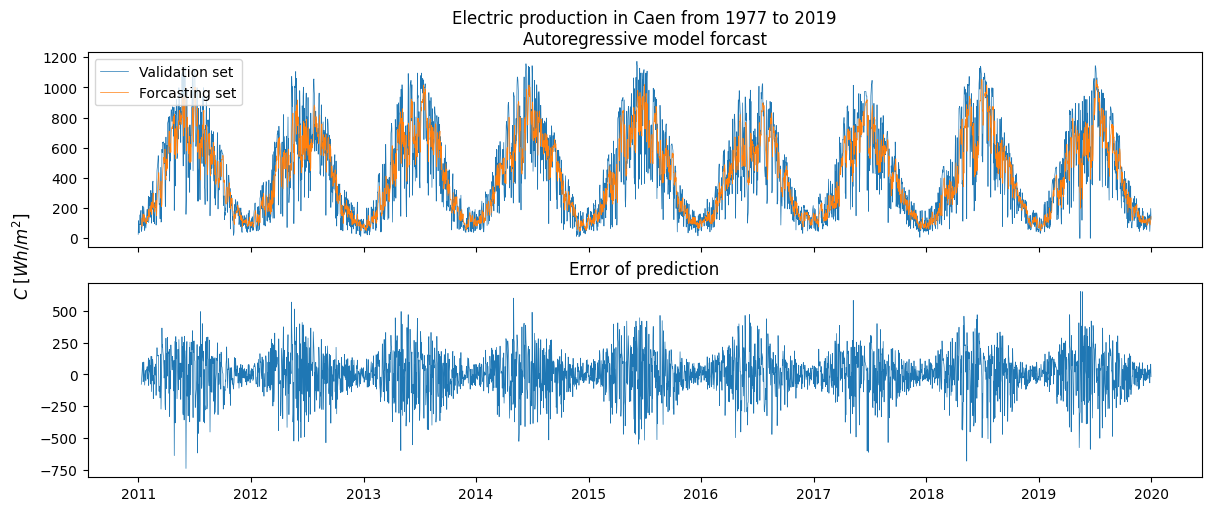

In [9]:
nmod = AutoReg(validation_set, 10, trend="n")
forecast = nmod.predict(res.params)

fig, axs = plt.subplots(2, 1, layout='constrained',sharex=True,figsize=(12, 5))
fig.supylabel("$C$ $[Wh/m^2]$")
axs[0].set_title("Electric production in Caen from 1977 to 2019\nAutoregressive model forcast")
axs[0].plot(validation_set, label="Validation set", linewidth=.5)
axs[0].plot(forecast, label="Forcasting set", linewidth=.5)
axs[0].legend()
axs[1].plot(validation_set.index, array(validation_set).T[0]-array(forecast), linewidth=.5)
axs[1].set_title("Error of prediction")
print("Mean Absolute Error with validation set : MAE = {}".format(mae(array(validation_set)[10:].T[0],array(forecast)[10:])))
print("R² = {}".format(corrcoef(array(validation_set)[10:].T[0], array(forecast)[10:])[0,1]**2))


### Réponse 3.2.b
Pendant les mois d'hiver, l'erreur est tout à fait acceptable, cependant, les mois d'été présentent beaucoup plus d'incertitudes sur la prévision, rendant l'erreur moins acceptable.
Au-delà de ça, on remarque que le modèle suit bien la tendance annuelle.

### Réponse 3.2.c
Au vu de la MAE et du R², on peut dire que la prévision est relativement fiable.